### Importation des librairies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Context
The dataset consists of lists of unique objects of popular portals for the sale of real estate in Russia. More than 540 thousand objects.
The dataset contains 540000 real estate objects in Russia.

### Content
The Russian real estate market has a relatively short history. In the Soviet era, all properties were state-owned; people only had the right to use them with apartments allocated based on one's place of work. As a result, options for moving were fairly limited. However, after the fall of the Soviet Union, the Russian real estate market emerged and Muscovites could privatize and subsequently sell and buy properties for the first time. Today, Russian real estate is booming. It offers many exciting opportunities and high returns for lifestyle and investment.
The real estate market has been in a growth phase for several years, which means that you can still find properties at very attractive prices, but with good chances of increasing their value in the future.

### Dataset
The dataset has 13 fields.

* date - date of publication of the announcement;
* time - the time when the ad was published;
* geo_lat - Latitude
* geo_lon - Longitude
* region - Region of Russia. There are 85 subjects in the country in total.
* building_type - Facade type. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden
* object_type - Apartment type. 1 - Secondary real estate market; 2 - New building;
* level - Apartment floor
* levels - Number of storeys
* rooms - the number of living rooms. If the value is "-1", then it means "studio apartment"
* area - the total area of ​​the apartment
* kitchen_area - Kitchen area
* price - Price. in rubles

Chargement des donnees et lecture du dataset

In [3]:
df = pd.read_csv("../all_v2.csv")
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


#### Analyse de la forme des donnees 

In [4]:
print(f"Nombre de lignes: {df.shape[0]}")
print(f"Nombre de colonnes: {df.shape[1]}")

Nombre de lignes: 5477006
Nombre de colonnes: 13


Nombred de types des differentes variables

In [5]:
print(df.dtypes.value_counts())

int64      7
float64    4
object     2
Name: count, dtype: int64


Types de chaque variable

In [6]:
print(f"object : {df.select_dtypes(include=['object']).columns}\n")
print(f"int : {df.select_dtypes(include=['int']).columns}\n")
print(f"float : {df.select_dtypes(include=['float']).columns}")

object : Index(['date', 'time'], dtype='object')

int : Index(['price', 'region', 'building_type', 'level', 'levels', 'rooms',
       'object_type'],
      dtype='object')

float : Index(['geo_lat', 'geo_lon', 'area', 'kitchen_area'], dtype='object')


Nombre de valeurs pour chaque variable

Cette operation nous donne une idee sur les types de graphe que nous pourront faire pendant l'analyse graphique des variables

In [7]:
df.nunique()

price            352726
date               1075
time              86400
geo_lat          448318
geo_lon          449701
region               84
building_type         6
level                39
levels               39
rooms                12
area              12741
kitchen_area       4154
object_type           2
dtype: int64

Verification des valeurs manquantes

In [8]:
df.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

Description statistique des donnees

In [9]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


#### Analyse graphique des donnees

Nous allons copier notre dataframe et effectuer un changement de type afin de faire certains graphes qui nous aiderons a mieux comprendre nos donnees 

In [10]:
data = df.copy()

data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_timedelta(data['time'])

data.dtypes.value_counts()

int64              7
float64            4
datetime64[ns]     1
timedelta64[ns]    1
Name: count, dtype: int64

Diagramme circulaire pour connaitre la proportion de certaines variables entieres

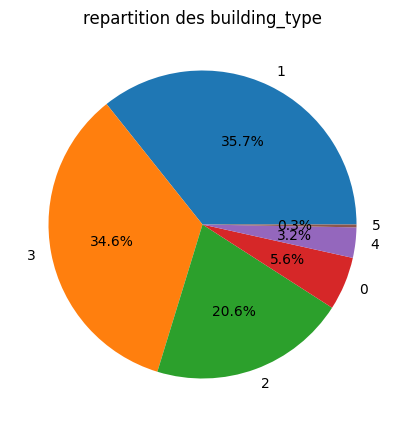

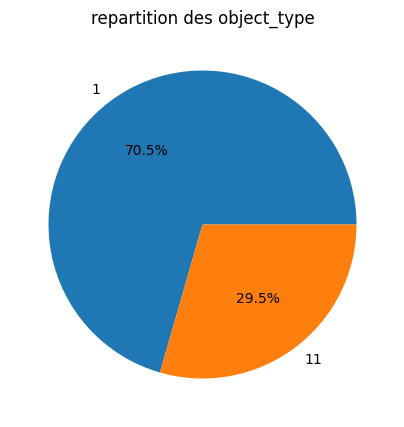

In [11]:
for x in ['building_type', 'object_type']:
    plt.figure(figsize=(5,5))
    plt.pie(data[x].value_counts(), labels=data[x].value_counts().index, autopct="%1.1f%%")
    plt.title(f"repartition des {x}")
    plt.show()

##### Building Type - Facade type
* 0 (other) : 5.6%
* 1 (panel) : 35.7%
* 2 (monolithic) : 20.6%
* 3 (brick) : 34.6%
* 4 (blocky) : 3.2%
* 5 (Wooden) : 0.3%

##### object_type - Apartment type. 
* 1 - Secondary real estate market : 29.5%
* 2 - New building : 70.5%

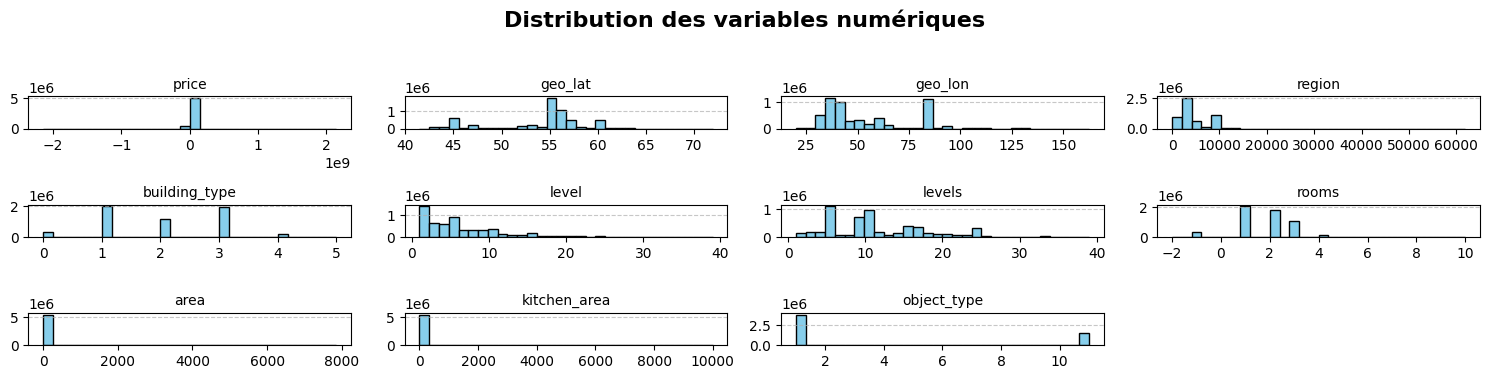

In [12]:
import matplotlib.pyplot as plt

# Sélection des colonnes numériques
num_cols = df.select_dtypes(include=['int', 'float']).columns

# Taille et disposition de la figure
plt.figure(figsize=(15, 8))
plt.suptitle("Distribution des variables numériques", fontsize=16, fontweight='bold')

# Boucle sur chaque colonne numérique
for i, col in enumerate(num_cols):
    plt.subplot(7, 4, i + 1)   # 7 lignes, 4 colonnes
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(col, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # laisse la place au titre global

plt.show()


area et kitchen_area suivent une distribution asymetrique (hypothese : presence de valeur abberantes)

On peut voir que les prix sont distribues de maniere normale

#### Verification des valeurs abberantes

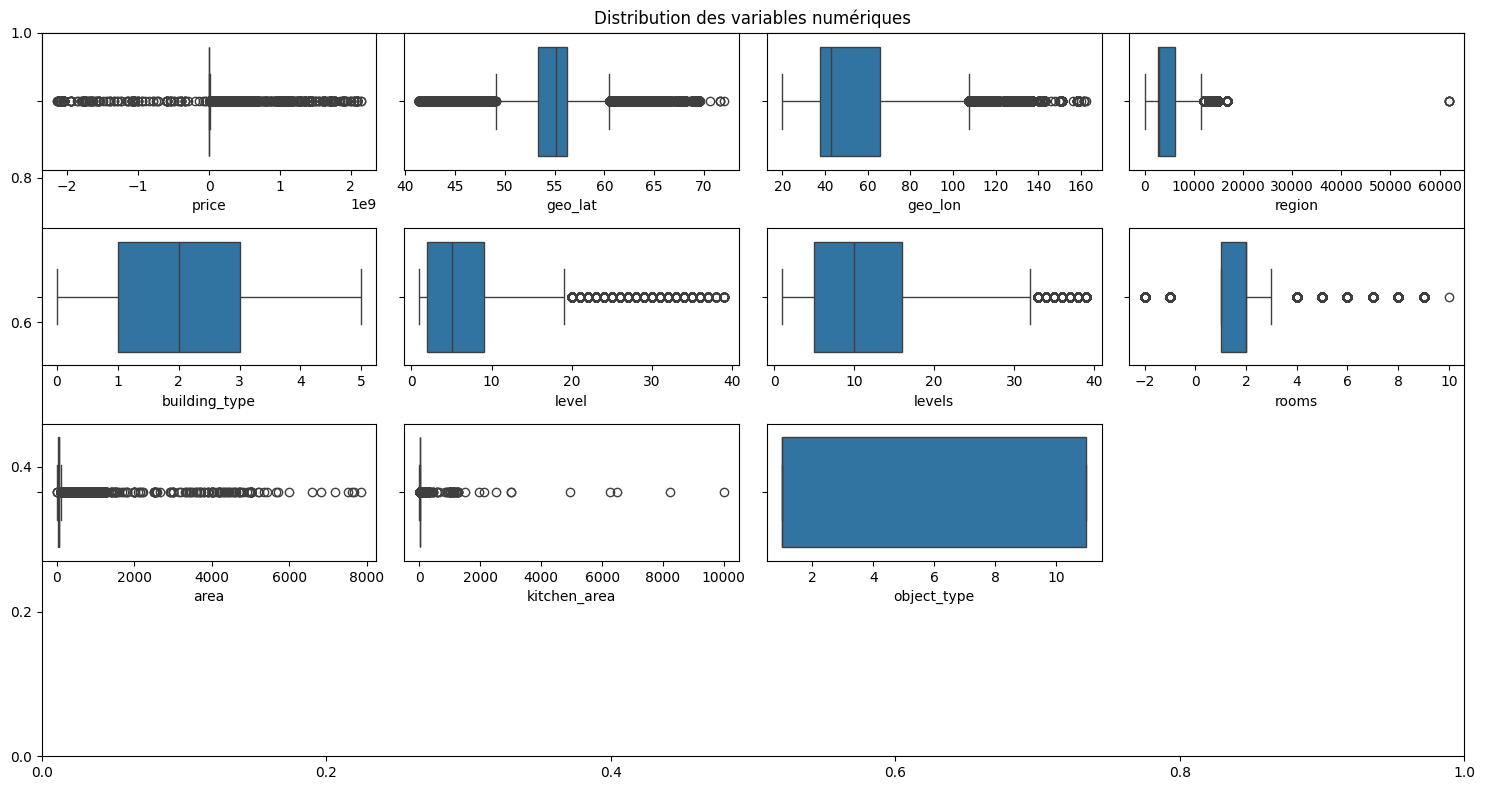

In [13]:
num_cols=df.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(15,8))
plt.title("Distribution des variables numériques")
for i, col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
plt.show()

Forte presence des valeurs abberantes dans la plupart des variables

##### Correlation entre les variables

<Axes: >

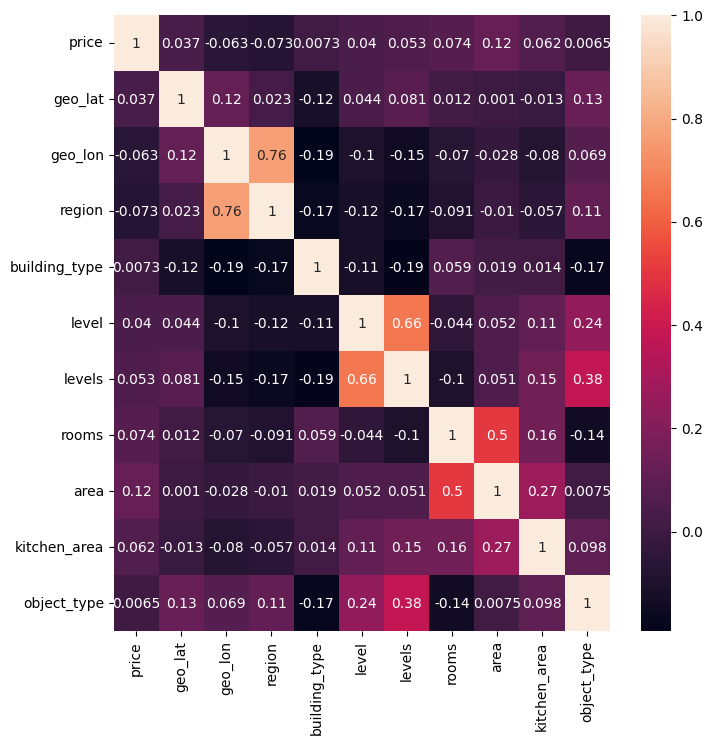

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.select_dtypes(include=['float', 'int']).corr(), annot=True)

Forte correlation entre region et geo_lat

Forte correlation entre level et levels

Faible correlation entre area et rooms

### Analyse graphique (variables - cible)

##### Annee et prix

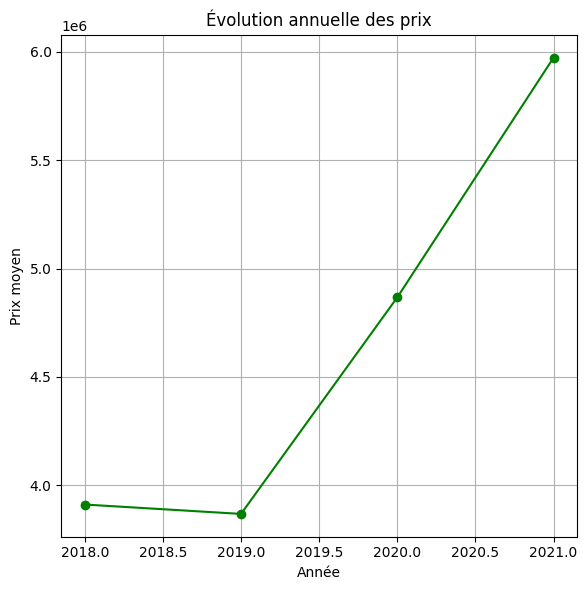

In [15]:
data['year'] = data['date'].dt.year

df_yearly = data.groupby("year")["price"].mean().reset_index()

# Création du graphique annuel
plt.figure(figsize=(6, 6))
plt.plot(df_yearly["year"], df_yearly["price"], marker="o", linestyle="-", color="g")

plt.title("Évolution annuelle des prix")
plt.xlabel("Année")
plt.ylabel("Prix moyen")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
data['year'].value_counts().sort_values()

year
2021     567108
2018     871581
2020    1804057
2019    2234260
Name: count, dtype: int64

En se basant sur le prix moyen par annee, on se rend compte que le prix des maisons a augmente drastiquement entre 2019 et 2021 pourtant entre 2018 et 2019 il y a une baisse (cela s'explique peut etre a cause du covid 19)

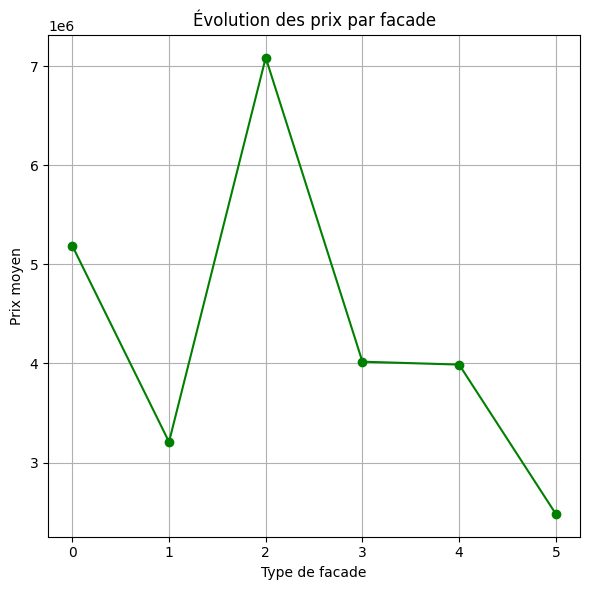

In [17]:
df_building = data.groupby("building_type")["price"].mean().reset_index()

plt.figure(figsize=(6, 6))
plt.plot(df_building["building_type"], df_building["price"], marker="o", linestyle="-", color="g")

plt.title("Évolution des prix par facade")
plt.xlabel("Type de facade")
plt.ylabel("Prix moyen")
plt.grid(True)
plt.tight_layout()
plt.show()

building_type - Facade type. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden

## Pretraitement

In [18]:
data = df.copy()

data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data = data.drop(columns=['time', 'date'])

On transforme la colonne date en type date puis on extrait les annees et ensuite on supprime les colonnes date et time

In [19]:
for col in ['area', 'kitchen_area']:
    print(f"{col} -> {data[col].skew()}")

area -> 57.05613874609268
kitchen_area -> 452.5307552125705


asymetrie extreme a droite nous allons donc faire quelques transformations sur ces dernieres (log, exp ou racine carree)

### Nettoyage

In [20]:
# traitement des outliers
def remove_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.15)
        Q3 = df[column].quantile(0.90)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        df = df[(df[column] >= borne_inf) & (df[column] <= borne_sup)]
    return df

In [21]:
data = remove_outliers(data)

In [22]:
df.shape, data.shape

((5477006, 13), (5317051, 12))

On applique notre fonction remove outliers sur notre dataset afin de supprimer les valeurs abberantes. Les choix du 15e et 90e percentiles se justifient par le fait qu'il bonifie notre r2. Initialement nous avions le 25e et le 75e mais cela nous donnait un r2 de 0.86 avec notre meilleur modele. Et cela se justifie par la perte de plus de 2 millions de donnees lorsque l'on l'utilisait. Apres plusieurs nous sommes sur les choix optimaux

### Separation des Donnees

In [23]:
# Séparation des données de target et des features
X = data.drop(columns=['price'])
y = data['price']

In [24]:
# séparation des données d'entrainement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Traitement de l'asymetrie

In [25]:
# correction des features numériques avec un skew > 1 ou < -1 et normalisation
from sklearn.preprocessing import PowerTransformer 
pt = PowerTransformer(standardize=True)
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

Ici on applique une fontion qui permet de rendre les distributions gaussiennes, elle permet egalement de standardiser les donnees

In [26]:
# Verification du skew après transformation
X_train_df = pd.DataFrame(X_train, columns=X.columns)
skewness = X_train_df.apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewness des features après transformation:")
print(skewness)

Skewness des features après transformation:
object_type      0.904090
rooms            0.098764
geo_lon          0.067179
kitchen_area     0.020168
area             0.017351
level            0.009610
geo_lat          0.007837
year             0.000000
levels          -0.022138
building_type   -0.093155
region          -0.440279
dtype: float64


### Creation des modeles

In [27]:
# Creation de 3 modeles pour la regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = XGBRegressor()

### Entrainement avec validation Croisee

En visualistion nos scores pour on pourra voir si nos modeles s'entrainent normalement sans overfitting ou underfitting

In [28]:
# Entrainement des modeles
from sklearn.model_selection import cross_val_score, KFold
import time
start_time = time.time()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores1 = cross_val_score(model1, X_train, y_train, cv=cv, scoring='r2')
end_time = time.time()
t1 = end_time - start_time
print(f"Temps d'entraînement pour le modèle 1: {t1} secondes")
start_time = time.time()
scores2 = cross_val_score(model2, X_train, y_train, cv=cv, scoring='r2')
end_time = time.time()
t2 = end_time - start_time
print(f"Temps d'entraînement pour le modèle 2: {t2} secondes")
start_time = time.time()
scores3 = cross_val_score(model3, X_train, y_train, cv=cv, scoring='r2')
end_time = time.time()
t3 = end_time - start_time
print(f"Temps d'entraînement pour le modèle 3: {t3} secondes")

Temps d'entraînement pour le modèle 1: 15.799968719482422 secondes
Temps d'entraînement pour le modèle 2: 311.5090262889862 secondes
Temps d'entraînement pour le modèle 3: 158.95758986473083 secondes


In [29]:
# afficher les scores
print(f"Model 1 R2 scores: {scores1}")
print(f"Model 2 R2 scores: {scores2}")
print(f"Model 3 R2 scores: {scores3}")

Model 1 R2 scores: [0.54064242 0.53917888 0.54135492 0.53954541 0.5400994 ]
Model 2 R2 scores: [0.87025243 0.86897466 0.86893876 0.86828182 0.86914963]
Model 3 R2 scores: [0.89395642 0.89192098 0.89388847 0.89345437 0.8942464 ]


In [30]:
# creation d'un dataframe pour comparer les modeles
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree ', 'XGBoost Regressor'],
    'CV Score': [np.mean(scores1), np.mean(scores2), np.mean(scores3)],
    'Training Time (s)': [t1, t2, t3]
})

results

,Model,CV Score,Training Time (s)
0,Linear Regression,0.540164,15.799969
1,Decision Tree,0.869119,311.509026
2,XGBoost Regressor,0.893493,158.957590


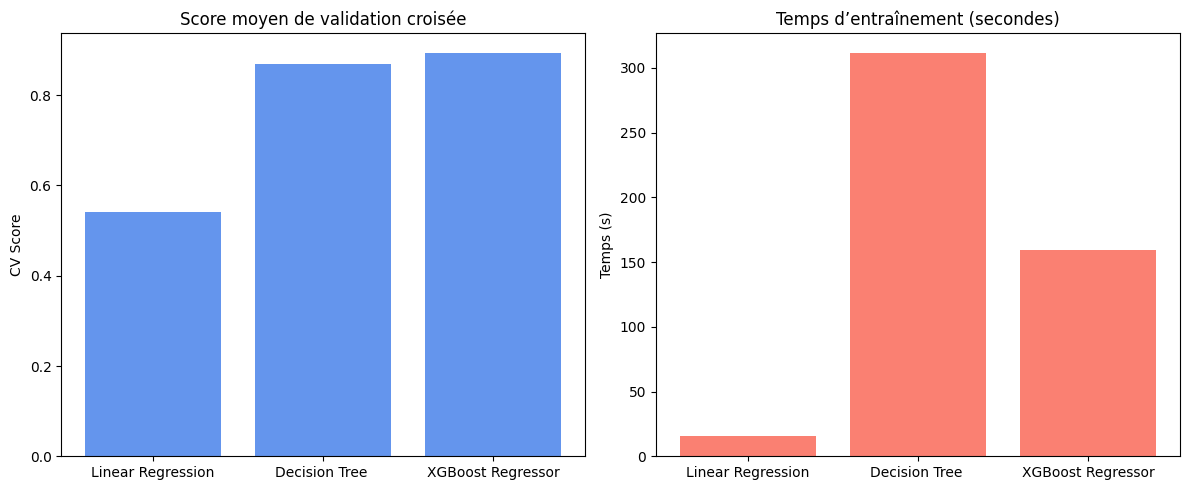

In [31]:
# comparer les resultats a l'aide d'un graphique

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Score CV
ax[0].bar(results['Model'], results['CV Score'], color='cornflowerblue')
ax[0].set_title('Score moyen de validation croisée')
ax[0].set_ylabel('CV Score')

# Temps d’entraînement
ax[1].bar(results['Model'], results['Training Time (s)'], color='salmon')
ax[1].set_title('Temps d’entraînement (secondes)')
ax[1].set_ylabel('Temps (s)')

plt.tight_layout()
plt.show()


On choisit XGBoost Regressor comme meilleur pour un bon compromis score et temps d'entrainement. La metrique de comparaison ici est le r2 score

In [32]:
# Evaluation de la performance des modeles
from sklearn.metrics import root_mean_squared_error, r2_score
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"XGBoost  - RMSE: {rmse}, R2: {r2}")

XGBoost  - RMSE: 901124.7060544341, R2: 0.8934953808784485


On verifie ici si le notre modele reussit a nous faire atteindre  notre objectif fixe initialement qui etait de creer un modele qui fait une erreur inferieure a 15% sur la prediction

In [33]:
# calcul du pourcentage d'erreur moyen absolu
rmse = (rmse / np.mean(y_test)) * 100
print(f"XGBoost - Pourcentage d'erreur moyen absolu: {rmse:.2f} %")

if rmse <= 15:
    print("L'erreur moyenne est ≤ 15%.")
else:
    print("L'erreur moyenne dépasse 15%.")

XGBoost - Pourcentage d'erreur moyen absolu: 23.95 %
L'erreur moyenne dépasse 15%.


## Optimisation

In [34]:
# calibration du modele XGBoost avec RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = RandomizedSearchCV(estimator=model3, param_distributions=param_dist, scoring='r2', cv=5, n_iter=10, random_state=42)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}


In [35]:
print("Score CV : ")
print(grid_search.best_score_)

Score CV : 
0.9043158411979675


#### Visualisation des scores pour chaque iteration

In [36]:
df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values("rank_test_score")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,92.404331,1.345598,4.010593,0.116380,300,7,0.10,"{'n_estimators': 300, 'max_depth': 7, 'learnin...",0.905237,0.903724,0.904405,0.904346,0.903867,0.904316,0.000531,1
6,67.391896,4.149733,2.678902,0.024423,200,7,0.10,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.899053,0.897457,0.898451,0.898215,0.897504,0.898136,0.000601,2
9,34.025873,0.225869,1.408520,0.088792,100,7,0.20,"{'n_estimators': 100, 'max_depth': 7, 'learnin...",0.898113,0.896665,0.897551,0.897035,0.896159,0.897105,0.000680,3
1,49.519267,2.062305,2.031295,0.201638,200,5,0.10,"{'n_estimators': 200, 'max_depth': 5, 'learnin...",0.878625,0.877538,0.878699,0.877336,0.877640,0.877968,0.000576,4
3,25.515286,0.356423,0.960697,0.007284,100,5,0.20,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",0.877089,0.876451,0.876917,0.876933,0.876321,0.876742,0.000300,5
8,26.535302,0.466268,0.981714,0.006661,100,5,0.10,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",0.859760,0.859221,0.860390,0.858093,0.859175,0.859328,0.000758,6
5,45.087341,1.049430,1.810944,0.104691,300,3,0.10,"{'n_estimators': 300, 'max_depth': 3, 'learnin...",0.855550,0.854630,0.854967,0.854082,0.853534,0.854553,0.000697,7
0,121.272781,3.333258,4.096540,0.099578,300,7,0.01,"{'n_estimators': 300, 'max_depth': 7, 'learnin...",0.843469,0.843163,0.843621,0.842930,0.843437,0.843324,0.000246,8
2,19.784733,1.026412,0.671519,0.022228,100,3,0.10,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",0.820368,0.819417,0.820925,0.821864,0.817165,0.819948,0.001602,9
4,19.105845,0.634018,0.674722,0.032221,100,3,0.01,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",0.560302,0.559791,0.560288,0.560470,0.559774,0.560125,0.000287,10


On passe nos meilleurs hyperparametres a notre modele afin de l'evaluer a nouveau et le sauvegarder

In [37]:
best_model = grid_search.best_estimator_ 

In [38]:
y_pred_train = best_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f"Best Model - Train RMSE: {rmse_train}, Train R2: {r2_train}")

Best Model - Train RMSE: 848587.6045436118, Train R2: 0.9060690999031067


In [39]:
y_pred_test = best_model.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Best Model - RMSE: {rmse_test}, R2: {r2_test}")

Best Model - RMSE: 852272.6457131149, R2: 0.9047301411628723


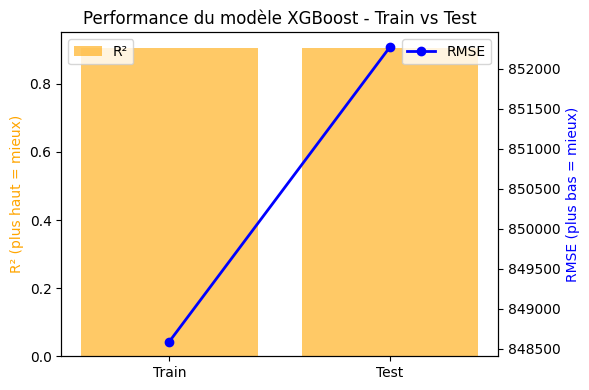

In [40]:
labels = ['Train', 'Test']
r2_scores = [r2_train, r2_test]
rmse_scores = [rmse_train, rmse_test]

fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()

ax1.bar(labels, r2_scores, color='orange', alpha=0.6, label='R²')
ax2.plot(labels, rmse_scores, color='blue', marker='o', linewidth=2, label='RMSE')

ax1.set_ylabel('R² (plus haut = mieux)', color='orange')
ax2.set_ylabel('RMSE (plus bas = mieux)', color='blue')
plt.title("Performance du modèle XGBoost - Train vs Test")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

Les scores a l'entrainement sont meilleurs qu'au test mais notre modele reussit a generaliser

In [41]:
# calcul du pourcentage d'erreur moyen absolu
rmse = (rmse_test / np.mean(y_test)) * 100
print(f"XGBoost - Pourcentage d'erreur moyen absolu: {rmse:.2f} %")

if rmse <= 15:
    print("L'erreur moyenne est ≤ 15%.")
else:
    print("L'erreur moyenne dépasse 15%.")

XGBoost - Pourcentage d'erreur moyen absolu: 22.65 %
L'erreur moyenne dépasse 15%.


Notre optimisation nous a permis de reduire notre erreur malgre que cela ne nous fasse toujours pas atteindre notre objectif


#### Sauvegarde du modele

In [42]:
import pickle

# xgboost est ton modèle entraîné
pickle.dump(pt, open('power.pickle', 'wb'))
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [43]:
from scipy.stats import uniform, randint
import sys, os
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Cette ligne execute "import mlflow" et s'assure s'il est dans l'environement séléctionné 

# Affiche le chemin complet de l’exécutable Python utilisé actuellement.
print("Python exec  :", sys.executable)

# Affiche la liste des dossiers contenant les bibliothèques installées dans ton environnement.
print("Site-packages:", [p for p in sys.path if "site-packages" in p])

# Ce bloc essaie d’importer MLflow pour confirmer qu’il est bien disponible.
try:
    # Si l’import réussit → il affiche la version installée.
    import mlflow
    print("mlflow ok   :", mlflow.__version__)

# Si ça échoue → il affiche l’erreur complète, utile pour le débogage
except Exception as e:
    print("Import ERROR:", repr(e))

Python exec  : c:\Users\User\AppData\Local\Programs\Python\Python312\python.exe
Site-packages: ['C:\\Users\\User\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin', 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages']
mlflow ok   : 3.6.0


In [45]:
import dagshub
dagshub.init(repo_owner='GamaSpeed', repo_name='ProjectIA_mlflow_dagshub_2025', mlflow=True)

import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

Accessing as GamaSpeed

Initialized MLflow to track repo "GamaSpeed/ProjectIA_mlflow_dagshub_2025"

Repository GamaSpeed/ProjectIA_mlflow_dagshub_2025 initialized!

🏃 View run capricious-dove-186 at: https://dagshub.com/GamaSpeed/ProjectIA_mlflow_dagshub_2025.mlflow/#/experiments/0/runs/ce33845fbd09430089b46e822d54b8dd
🧪 View experiment at: https://dagshub.com/GamaSpeed/ProjectIA_mlflow_dagshub_2025.mlflow/#/experiments/0


In [46]:
# Se connecter au serveur local MLflow
mlflow.set_tracking_uri(uri="https://dagshub.com/GamaSpeed/ProjectIA_mlflow_dagshub_2025.mlflow")

In [47]:
# Créer ou activer une expérience
mlflow.set_experiment("Mon_Projet_IA")

<Experiment: artifact_location='mlflow-artifacts:/31709e96316447e3b55d0ec4b8856a70', creation_time=1763430666780, experiment_id='1', last_update_time=1763430666780, lifecycle_stage='active', name='Mon_Projet_IA', tags={'mlflow.sharedViewState.3894e7dac091113a949e1a0b144bdfbf23f857b1cfb2b6251e919052fe25b155': 'deflate;eJxdUtFO4zAQ/JWTnysEr3kLpdwhWoRSqE6qTq1rb8lKjh1519Ac6r+zbgIpPO7szOx61u+KQEdT36JjiKpQaqJCtBCvu3vopNbMEXeJgS6IdeQNYwMjqSSjir12BBN16j/ldqHK+VxIDvdgOuPgy740jK9ZbzVrAqbPzvrfRDXBgltBJAx+VDj3q0qeREPgwDDYaXCpEaRYn6+3XYYUDWyFeI4usin9RG/68VslY6O4zw6t9hasKt6PPfKI3ud6PTD+oLXgx3qFhDt0yN1Ct6Osp+WhsvvtXbV82lxdbqrnh6Vs8IrwttAHbPB/th5yE9kciT8HDChSaYykLFlUcEr7TJIIfseQWrAr7RLQnZ/WEr5EwjFJv0YLs6bl7jv8kjXXclafnBvKH0/XiUMF+whUz7zeuYwPYhd22s3Rw8l0GvweX0SkDuUBqf8txNCe7u5h2YTAtQeS6Zfj7f5m8gLkEqaXqOPxA/ej5lc='}>

In [48]:
# Démarrer une exécution avec MLflow 
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_path = os.path.join(parent_dir, "all_v2.csv")
with mlflow.start_run(run_name='XGBoost - Russian Housing Prices'): 
    # Enregistrer les hyperparamètres du modèle 
    mlflow.log_params(best_model.get_params())

    mlflow.log_artifact(data_path, artifact_path="data")

    # Enregistrer les métriques de performance 
    mlflow.log_metrics({
        "R2-1" : r2_test,
        "RMSE-1" : rmse_test
    })

    # Sauvegarder le modèle 
    import joblib
    model_path = "best_xgboost.pkl"
    joblib.dump(best_model, model_path)
    mlflow.log_artifact(model_path, artifact_path="model")

🏃 View run XGBoost - Russian Housing Prices at: https://dagshub.com/GamaSpeed/ProjectIA_mlflow_dagshub_2025.mlflow/#/experiments/1/runs/bc465817bdd543a7acdfc005e574fb9a
🧪 View experiment at: https://dagshub.com/GamaSpeed/ProjectIA_mlflow_dagshub_2025.mlflow/#/experiments/1


In [49]:
# Vérifier où MLflow enregistre les expériences.
mlflow.get_tracking_uri()

'https://dagshub.com/GamaSpeed/ProjectIA_mlflow_dagshub_2025.mlflow'